In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
brain_mri = nib.load('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/03-Preprocessing/IXI662-Guys-1120-T1.nii.gz')
print(brain_mri)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 150)
affine:
[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     1.2000039  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code     

In [6]:
print(brain_mri.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     1.2000039  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'MR')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.46861374
quatern_c       : -0.52952915
quatern_d    

In [9]:
affine = brain_mri.affine
print(affine)
shape = brain_mri.shape
print(shape)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(256, 256, 150)


In [10]:
brain_mri.header.get_zooms()

(np.float32(0.9375), np.float32(0.9375), np.float32(1.2000039))

In [ ]:
nib.aff2axcodes(affine) #! The end of the corresponding axis in the image data array
# P = anterior- #!posterior (front-back)
# S = inferior - #!superior (bottom-top)
# R = left- #!right

('P', 'S', 'R')

(256, 256, 150)


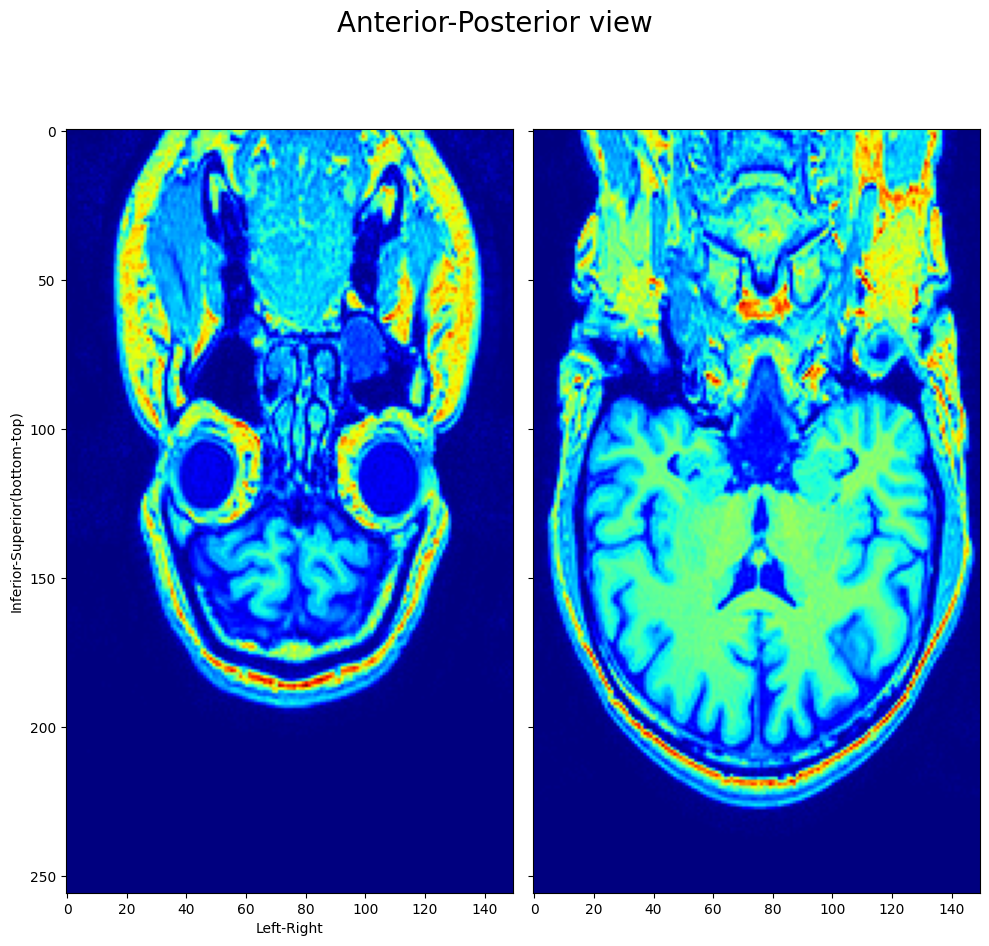

In [31]:
# Visualizing the image # Anterior-Posterior view
brain_mri_data = brain_mri.get_fdata()
print(brain_mri_data.shape)
fig, axis  = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
axis[0].imshow(brain_mri_data[50, :, :], cmap='jet')
axis[1].imshow(brain_mri_data[120, :, :], cmap='jet')
plt.suptitle('Anterior-Posterior view', fontsize=20)
axis[0].set_xlabel('Left-Right')
axis[0].set_ylabel('Inferior-Superior(bottom-top)')
plt.tight_layout()

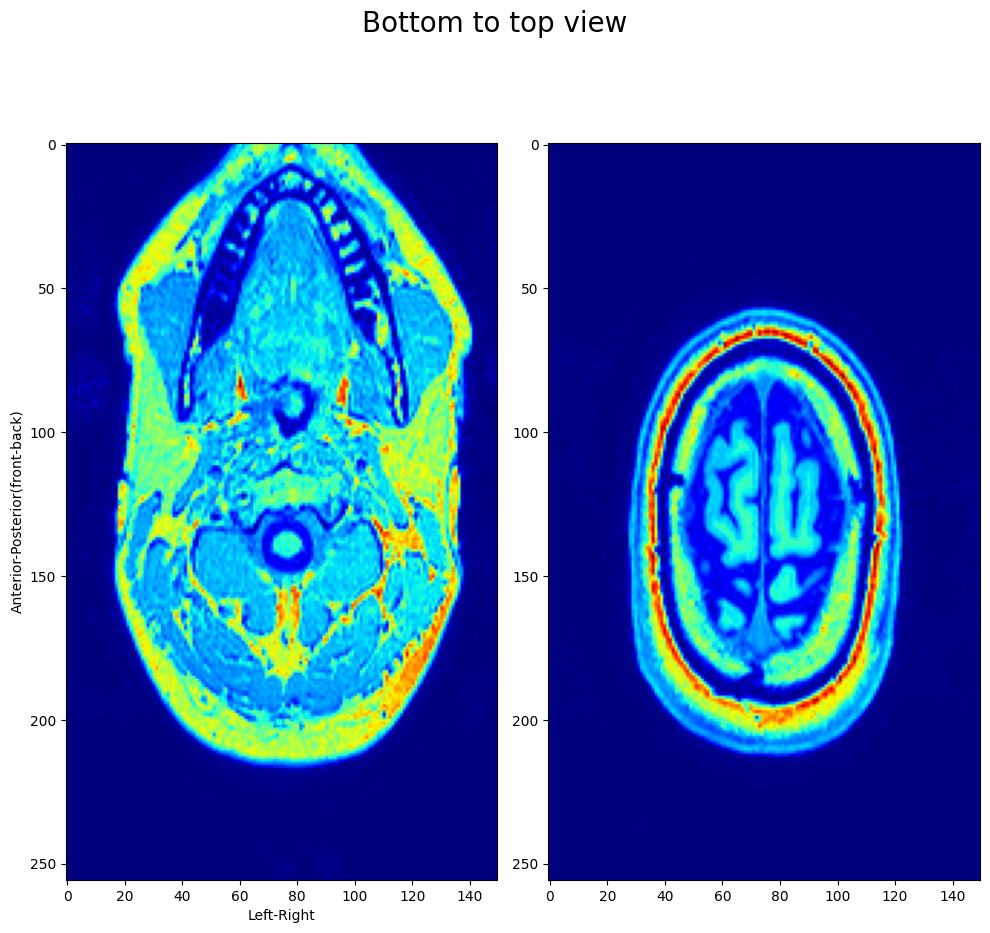

In [32]:
# Visualizing the image # Bottom to top view
brain_mri_data = brain_mri.get_fdata()
fig, axis  = plt.subplots(1, 2, figsize=(10, 10))
axis[0].imshow(brain_mri_data[:, 30, :], cmap='jet')
axis[1].imshow(brain_mri_data[:, 200, :], cmap='jet')
plt.suptitle('Bottom to top view', fontsize=20)
axis[0].set_xlabel('Left-Right')
axis[0].set_ylabel('Anterior-Posterior(front-back)')
plt.tight_layout()

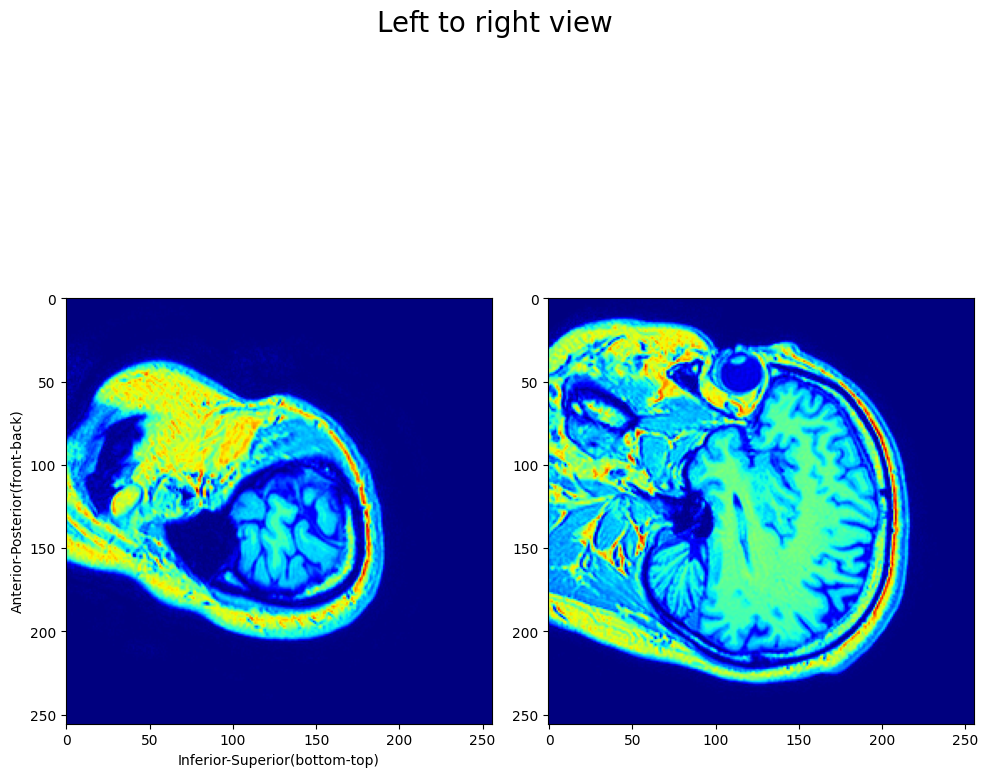

In [34]:
# Visualizing the image # Left to right view
brain_mri_data = brain_mri.get_fdata()
fig, axis  = plt.subplots(1, 2, figsize=(10, 10))
axis[0].imshow(brain_mri_data[:, :, 20], cmap='jet')
axis[1].imshow(brain_mri_data[:, :, 45], cmap='jet')
plt.suptitle('Left to right view', fontsize=20)
axis[0].set_ylabel('Anterior-Posterior(front-back)')
axis[0].set_xlabel('Inferior-Superior(bottom-top)')
plt.tight_layout()

In [40]:
# Transform from Vioxel to physical coordinates space
voxel_coords = np.array((0, 0, 0, 1))
physical_coords = affine @ voxel_coords # @ is the matrix multiplication operator which is equivalent to np.dot
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [36]:
# verify results
affine[:,3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

In [ ]:
# transform manually
voxel_coords_manual = np.array((0, 0, 0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3, 3]
physical_coords_manual

# this can be written as a mathematical equation

array([ -90.67985535,  102.82944489, -114.82378387])

In [42]:
physical_coords =[ -90.67985535,  102.82944489, -114.82378387,    1.         ]
np.round(np.linalg.inv(affine) @ physical_coords)

array([-0.,  0., -0.,  1.])

# Part 2
## Resample a volume to a smaller size

In [ ]:
# Resampele a volume
print(brain_mri.shape) # shape 
print(brain_mri.header.get_zooms()) # size of the voxel

(256, 256, 150)
(np.float32(0.9375), np.float32(0.9375), np.float32(1.2000039))


In [46]:
# Change from 256x256x150 to 128x128x100

# change the voxel size
import nibabel.processing
voxel_size = (2, 2, 2)
brain_mri_resized = nib.processing.conform(brain_mri, (128,128,100), voxel_size, orientation='PSR')
brain_mri_resized_data = brain_mri_resized.get_fdata()
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(128, 128, 100)
(np.float32(2.0), np.float32(2.0), np.float32(2.0))


Text(0.5, 0, 'Inferior-Superior(bottom-top)')

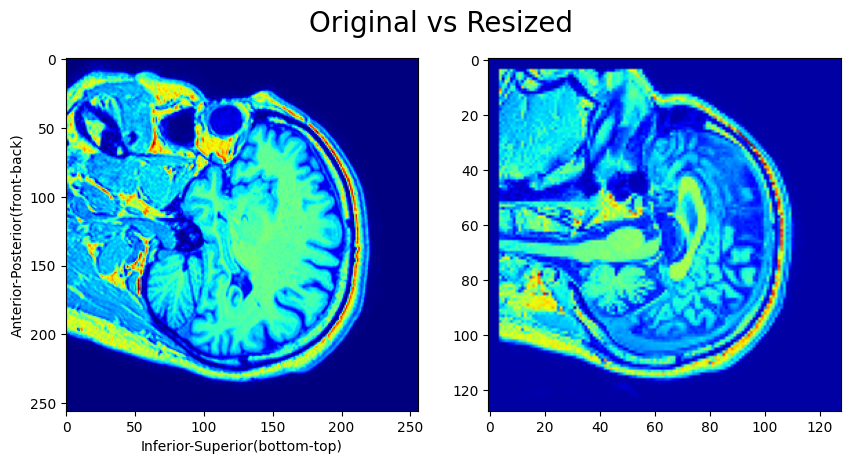

In [60]:
fig, axis  = plt.subplots(1, 2, figsize=(10, 10), )
axis[0].imshow(brain_mri_data[:, :, 50], cmap='jet')
axis[1].imshow(brain_mri_resized_data[:, :, 50], cmap='jet')
plt.suptitle('Original vs Resized', fontsize=20,  y=0.72)
axis[0].set_ylabel('Anterior-Posterior(front-back)')
axis[0].set_xlabel('Inferior-Superior(bottom-top)')

# Normalization and Standardization

In [ ]:
# CT: -1000 to 1000 Air to Water but actually scale -1024 to 3071
## Dont use normalization to keep those scale instead scale the volume 1:3071

In [61]:
lung_ct = nib.load('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/03-Preprocessing/lung_043.nii.gz')
lung_ct_data = lung_ct.get_fdata()
print(lung_ct_data.min(), lung_ct_data.max())

-1024.0 1954.0


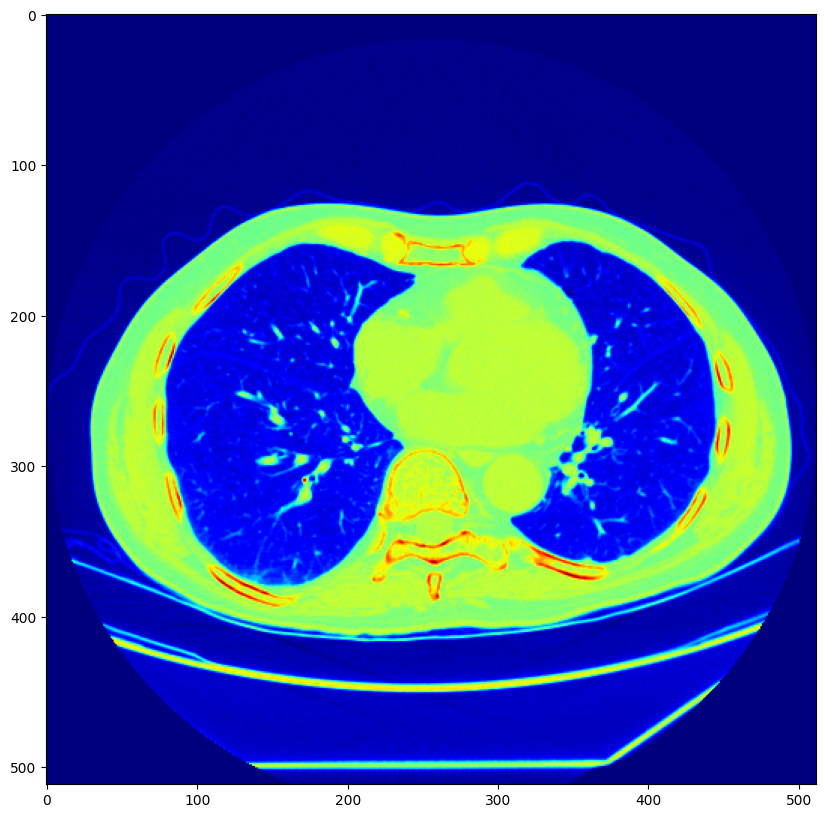

In [64]:
lung_ct_data_standardized = (lung_ct_data) / 3071
plt.figure(figsize=(10, 10))
plt.imshow(np.rot90(lung_ct_data_standardized[:, :, 50]), cmap='jet')

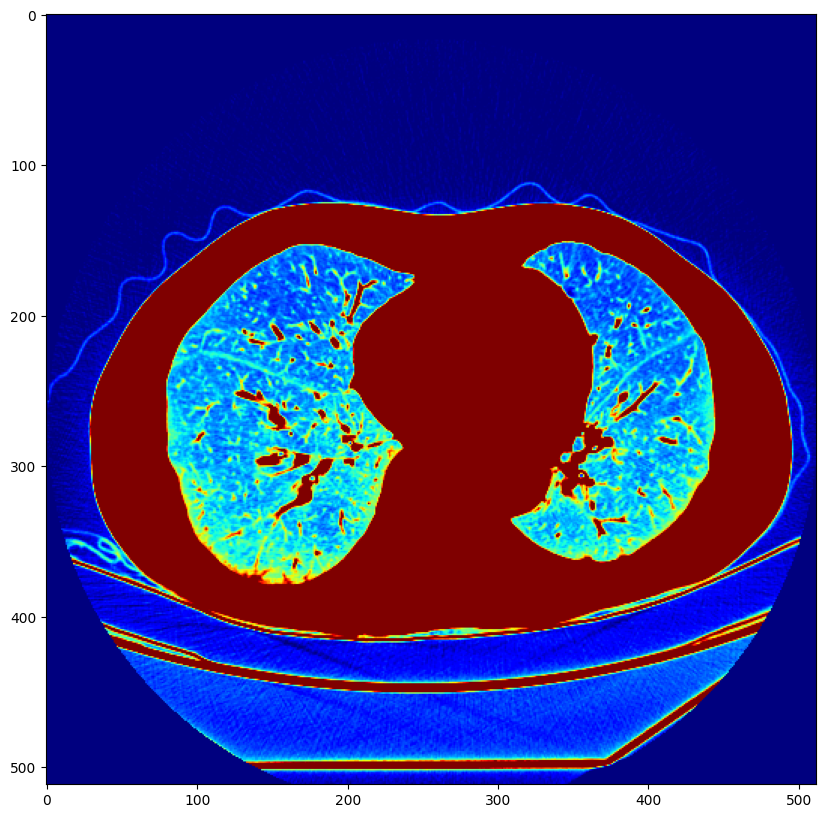

In [65]:
lung_ct_data_window = np.clip(lung_ct_data, -1000, -500)
plt.figure(figsize=(10, 10))
plt.imshow(np.rot90(lung_ct_data_window[:, :, 50]), cmap='jet')

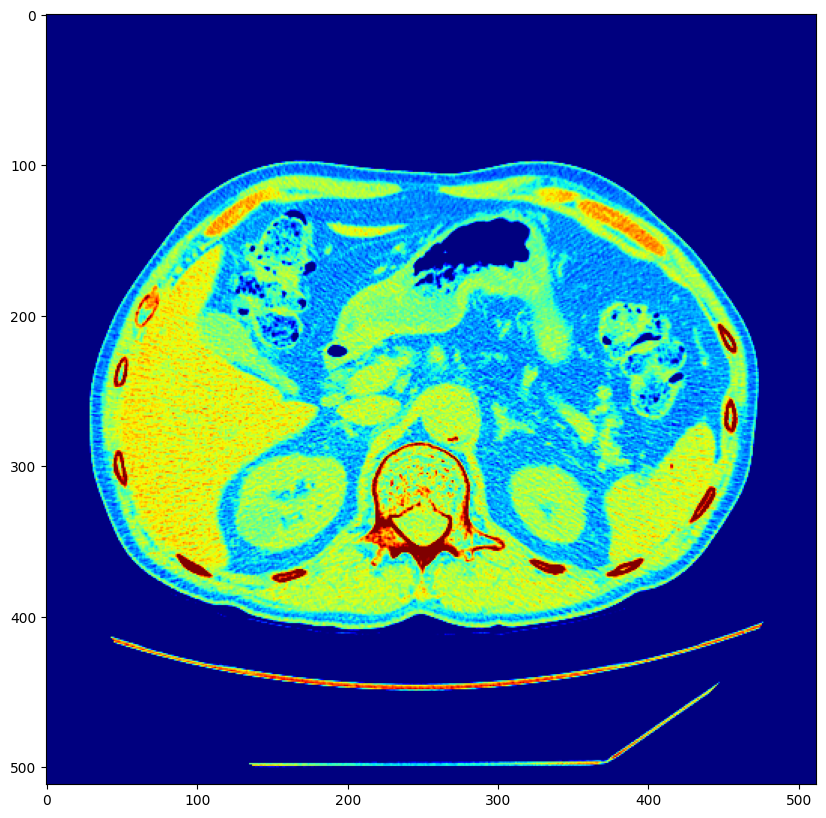

In [67]:
lung_ct_soft_tissue_window = np.clip(lung_ct_data, -250, 250)
plt.figure(figsize=(10, 10))
plt.imshow(np.rot90(lung_ct_soft_tissue_window[:, :, 5]), cmap='jet')

In [68]:
cardiac_mri = nib.load('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/03-Preprocessing/la_003.nii.gz')
cardiac_mri_data = cardiac_mri.get_fdata()
print(cardiac_mri_data.min(), cardiac_mri_data.max())

0.0 1999.0


In [69]:
# preform set normalization
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_data_norm = (cardiac_mri_data - mean) / std

# standardize the data
cardiac_mri_data_standardized = (cardiac_mri_data_norm - cardiac_mri_data_norm.min()) / (cardiac_mri_data_norm.max() - cardiac_mri_data_norm.min())

In [70]:
np.mean(cardiac_mri_data_standardized), np.min(cardiac_mri_data_standardized), np.max(cardiac_mri_data_standardized)

(np.float64(0.08641350659554545), np.float64(0.0), np.float64(1.0))

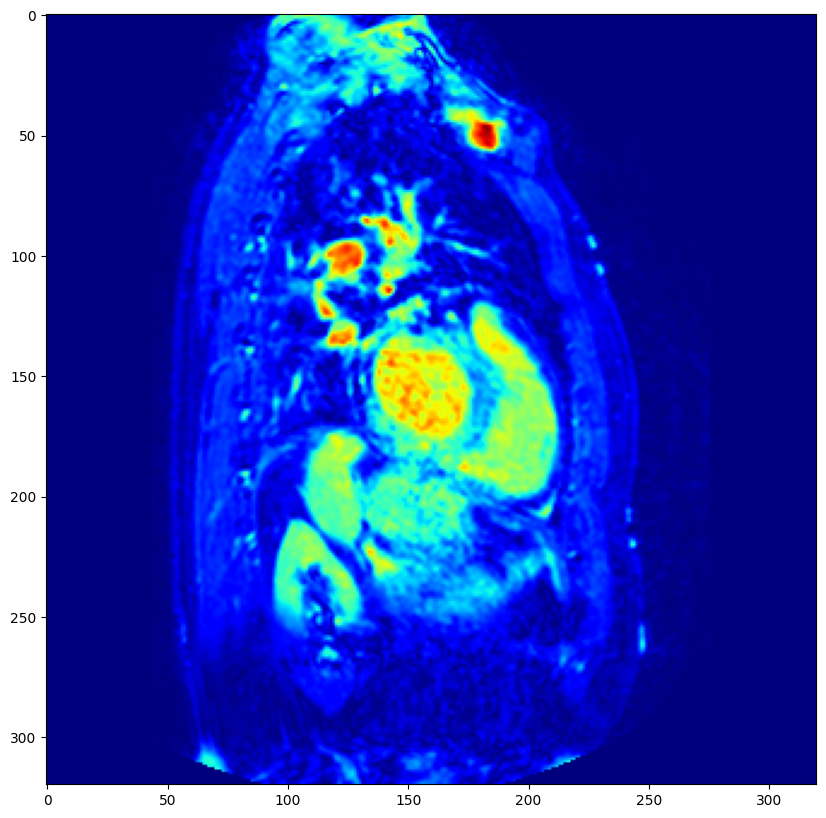

In [72]:
plt.figure(figsize=(10, 10))
plt.imshow(np.rot90(cardiac_mri_data_standardized[:, :, 50]), cmap='jet')